# Câu hỏi: 
- Các phim thuộc cùng thể loại có xu hướng nhận được điểm đánh giá (Score) hoặc độ phổ biến (Popularity) tương tự hay không?
- Lợi ích: 
    - giúp xác định xem liệu anime được nhiều người đánh giá có xu hướng được đánh giá cao hơn không. Từ đó, các nhà sản xuất có thể đánh giá độ tin cậy của điểm trung bình dựa trên số lượng người đánh giá.
    - Hiểu được ảnh hưởng của thể loại đến đánh giá và sự yêu thích của người xem.
    - Xác định các thể loại có tính đồng nhất cao về điểm số hoặc độ phổ biến.
- Cách tìm câu trả lời:
    - Tăng hiệu quả của hệ thống gợi ý bằng cách nhóm các thể loại có đặc điểm tương đồng.
    - Gợi ý anime phù hợp hơn dựa trên sở thích thể loại của người dùng.

# Đọc dữ liệu

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [184]:
df = pd.read_csv('anime_genres_encoded.csv')

In [185]:
df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,...,0,0,0,0,1,0,0,0,0,0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,...,0,0,0,0,1,0,0,0,0,0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,...,0,0,0,0,1,0,0,0,0,0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,...,0,0,1,0,0,0,0,1,0,0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,...,0,0,0,0,0,0,0,0,0,0


In [186]:
print("Missing values:")
print(df[['Score', 'Scored By', 'Popularity']].isnull().sum())

Missing values:
Score         8047
Scored By     8047
Popularity       0
dtype: int64


In [187]:
df = df.dropna(subset=['Score', 'Scored By'])

print("Missing values after cleaning:")
print(df[['Score', 'Scored By', 'Popularity']].isnull().sum())

Missing values after cleaning:
Score         0
Scored By     0
Popularity    0
dtype: int64


In [188]:
def extract_year(aired):
    try:
        # Nếu có khoảng thời gian
        if "to" in aired:  
            start_date = aired.split("to")[0].strip()  # Lấy ngày bắt đầu
            year = parser.parse(start_date, fuzzy=True).year  # Trích xuất năm
        else:  # Nếu chỉ có một ngày duy nhất
            year = parser.parse(aired, fuzzy=True).year  # Trích xuất năm từ ngày
        return year
    except (ValueError, TypeError):  # Xử lý lỗi không hợp lệ
        return np.nan  # Trả về NaN nếu không thể xử lý

# Áp dụng hàm trích xuất năm
df["Year"] = df["Aired"].apply(extract_year)
# Loại bỏ các hàng có giá trị "NaN" trong cột "Year"
df = df.dropna(subset=["Year"])
df.shape

(16932, 37)

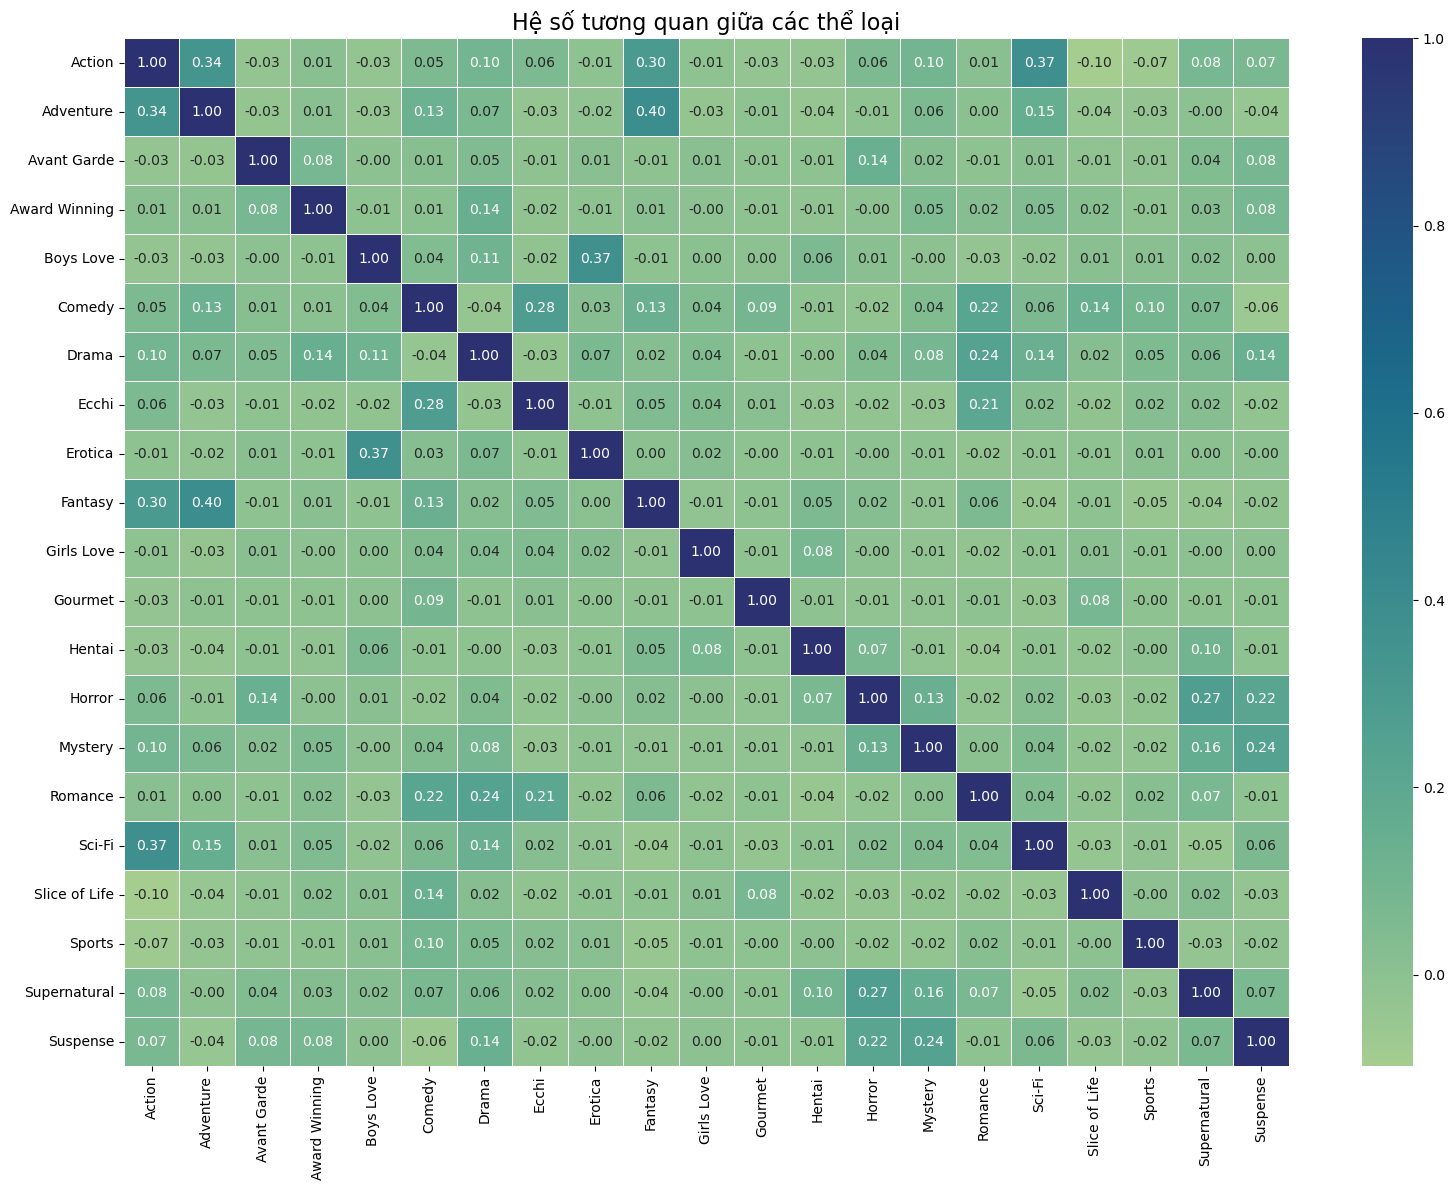

In [214]:
# Lấy danh sách các cột thể loại (từ 'Action' đến 'UNKNOWN')
genre_columns = [
    'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 
    'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 
    'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 
    'Supernatural', 'Suspense'
]

# Tính ma trận tương quan giữa các thể loại
correlation_matrix = df[genre_columns].corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="crest", linewidths=0.5)
plt.title("Hệ số tương quan giữa các thể loại", fontsize=16)
plt.tight_layout()
plt.show()


Thể loại có tương quan cao:

Các thể loại có hệ số tương quan cao (ví dụ: trên 0.3) thường xuất hiện cùng nhau trong cùng một bộ phim:

Action và Adventure có tương quan 0.34, cho thấy các phim hành động thường kết hợp với phiêu lưu.

Fantasy và Adventure có tương quan 0.40, thể hiện mối liên kết mạnh mẽ giữa hai thể loại này.

Horror và Mystery có tương quan 0.14, mặc dù không cao nhưng vẫn có sự liên kết.

Thể loại không liên quan:

Các cặp thể loại có tương quan gần 0 thường ít hoặc không xuất hiện cùng nhau:

Action và Avant Garde có tương quan gần bằng 0, cho thấy các phim hành động hầu như không liên quan đến Avant Garde.

Comedy và Horror cũng không có mối liên hệ đáng kể.

Thể loại độc lập:

Một số thể loại như Award Winning, Boys Love, Gourmet có hệ số tương quan thấp với hầu hết các thể loại khác, thể hiện rằng chúng thường độc lập và ít kết hợp.

In [224]:
# Lọc các cặp thể loại có tương quan cao (> 0.3)
high_corr = correlation_matrix.unstack().reset_index()
high_corr.columns = ['Genre1', 'Genre2', 'Correlation']

# Loại bỏ các cặp trùng lặp (Genre1 - Genre2 và Genre2 - Genre1)
high_corr = high_corr[high_corr['Genre1'] < high_corr['Genre2']]

# Lọc các cặp có tương quan cao
high_corr = high_corr[high_corr['Correlation'] > 0.3]

# Hiển thị kết quả
print(high_corr.sort_values(by="Correlation", ascending=False))


       Genre1     Genre2  Correlation
30  Adventure    Fantasy     0.395190
16     Action     Sci-Fi     0.374321
92  Boys Love    Erotica     0.372118
1      Action  Adventure     0.335212


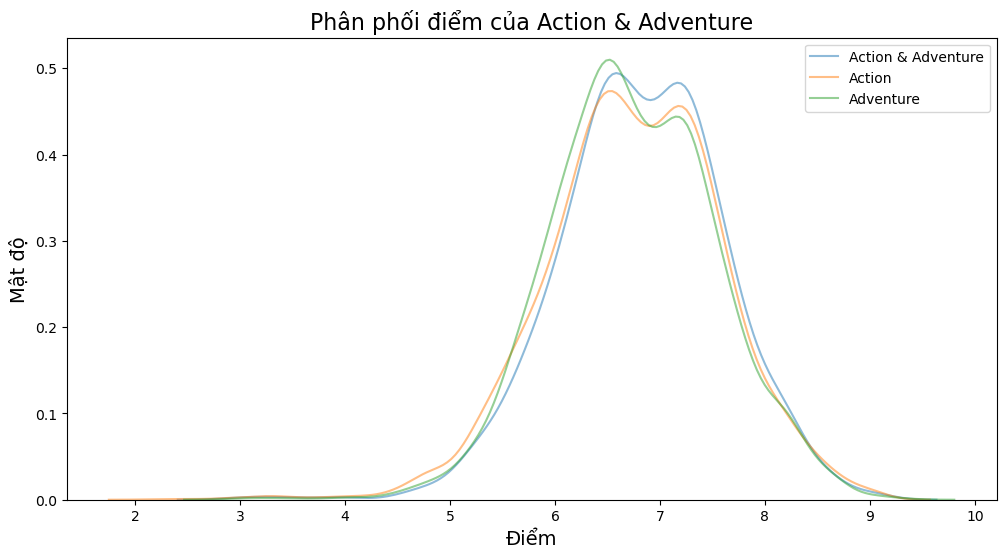

In [222]:
# Phân phối điểm cho Action và Adventure
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.kdeplot(df[(df['Action'] == 1) & (df['Adventure'] == 1)]['Score'], label='Action & Adventure', fill=False, alpha=0.5)
sns.kdeplot(df[df['Action'] == 1]['Score'], label='Action', fill=False, alpha=0.5)
sns.kdeplot(df[df['Adventure'] == 1]['Score'], label='Adventure', fill=False, alpha=0.5)
plt.title("Phân phối điểm của Action & Adventure", fontsize=16)
plt.xlabel("Điểm", fontsize=14)
plt.ylabel("Mật độ", fontsize=14)
plt.legend()
plt.show()


In [205]:
# Nhóm theo tổ hợp thể loại và tính trung bình/độ lệch chuẩn
genre_combination_stats = df.groupby('Genres').agg({
    'Score': ['mean', 'std'],
    'Popularity': ['mean', 'std'],
    'Title': 'count'
}).rename(columns={'Title': 'Count'}).reset_index()
genre_combination_stats.columns = ['Genres', 'Score', 'Score_std', 'Popularity', 'Popularity_std', 'Count']
genre_combination_stats.head()

,Genres,Score,Score_std,Popularity,Popularity_std,Count
0,"Action, Adventure",6.728211,0.884333,8193.084211,4990.086634,95
1,"Action, Adventure, Avant Garde, Mystery, Super...",5.790000,NaN,10388.000000,NaN,1
2,"Action, Adventure, Award Winning, Comedy, Dram...",7.820000,NaN,1368.000000,NaN,1
3,"Action, Adventure, Award Winning, Comedy, Dram...",7.950000,NaN,970.000000,NaN,1
4,"Action, Adventure, Award Winning, Comedy, Ecchi",7.760000,NaN,2797.000000,NaN,1


In [206]:
print(genre_combination_stats.columns)

Index(['Genres', 'Score', 'Score_std', 'Popularity', 'Popularity_std',
       'Count'],
      dtype='object')


In [207]:
# Lọc các tổ hợp thể loại có số lượng phim >= ngưỡng (ví dụ: 10 phim)
threshold = 10  # Ngưỡng số lượng phim
filtered_combinations = genre_combination_stats[genre_combination_stats['Count'] >= threshold]

# Kiểm tra kết quả
print(filtered_combinations.head())
print(f"Số lượng tổ hợp thể loại sau khi lọc: {filtered_combinations.shape[0]}")

                                               Genres     Score  Score_std  \
0                                   Action, Adventure  6.728211   0.884333   
14                          Action, Adventure, Comedy  6.654490   0.628056   
15                   Action, Adventure, Comedy, Drama  6.943333   0.801162   
16          Action, Adventure, Comedy, Drama, Fantasy  7.044000   0.341929   
19  Action, Adventure, Comedy, Drama, Romance, Sci-Fi  6.974000   0.521604   

      Popularity  Popularity_std  Count  
0    8193.084211     4990.086634     95  
14  10175.795918     3788.621610     49  
15   4034.333333     2356.784841     12  
16   3078.200000     1868.422793     10  
19   6045.000000     1348.566646     10  
Số lượng tổ hợp thể loại sau khi lọc: 160


In [209]:
# Tính độ phân tán (std) cho từng thể loại
genre_stats = genre_combination_stats[['Genres', 'Score_std', 'Popularity_std']].copy()

# Lọc các thể loại có độ phân tán thấp (dưới ngưỡng)
low_dispersion = genre_stats[(genre_stats['Score_std'] <= 0.5) & (genre_stats['Popularity_std'] <= 50)]

# Hiển thị các thể loại có độ phân tán thấp
print("Các thể loại có sự đồng nhất cao:")
print(low_dispersion)

Các thể loại có sự đồng nhất cao:
                                Genres  Score_std  Popularity_std
297  Action, Horror, Mystery, Suspense   0.473762       27.577164


In [203]:
# Tính tương quan giữa Score và các thể loại
correlation_score = df[genre_columns + ['Score']].corr()['Score'].drop('Score').sort_values(ascending=False)
print("Tương quan giữa thể loại và điểm đánh giá (Score):")
print(correlation_score)

# Tính tương quan giữa Popularity và các thể loại
correlation_popularity = df[genre_columns + ['Popularity']].corr()['Popularity'].drop('Popularity').sort_values(ascending=False)
print("Tương quan giữa thể loại và độ phổ biến (Popularity):")
print(correlation_popularity)


Tương quan giữa thể loại và điểm đánh giá (Score):
Action           0.212919
Drama            0.198618
Romance          0.174531
Adventure        0.165467
Fantasy          0.158212
Mystery          0.150238
Comedy           0.126723
Award Winning    0.120528
Suspense         0.107422
Supernatural     0.106065
Sci-Fi           0.096281
Gourmet          0.027703
Slice of Life    0.022826
Sports           0.018027
Girls Love       0.016856
Ecchi            0.012546
Boys Love        0.006971
Erotica         -0.011707
Horror          -0.025190
Avant Garde     -0.063019
Hentai          -0.070623
Name: Score, dtype: float64
Tương quan giữa thể loại và độ phổ biến (Popularity):
Avant Garde      0.022287
Slice of Life    0.002224
Hentai          -0.006920
Sports          -0.019196
Gourmet         -0.027959
Erotica         -0.036099
Girls Love      -0.052421
Boys Love       -0.057387
Horror          -0.062443
Award Winning   -0.095631
Suspense        -0.138455
Adventure       -0.140616
Supernatu

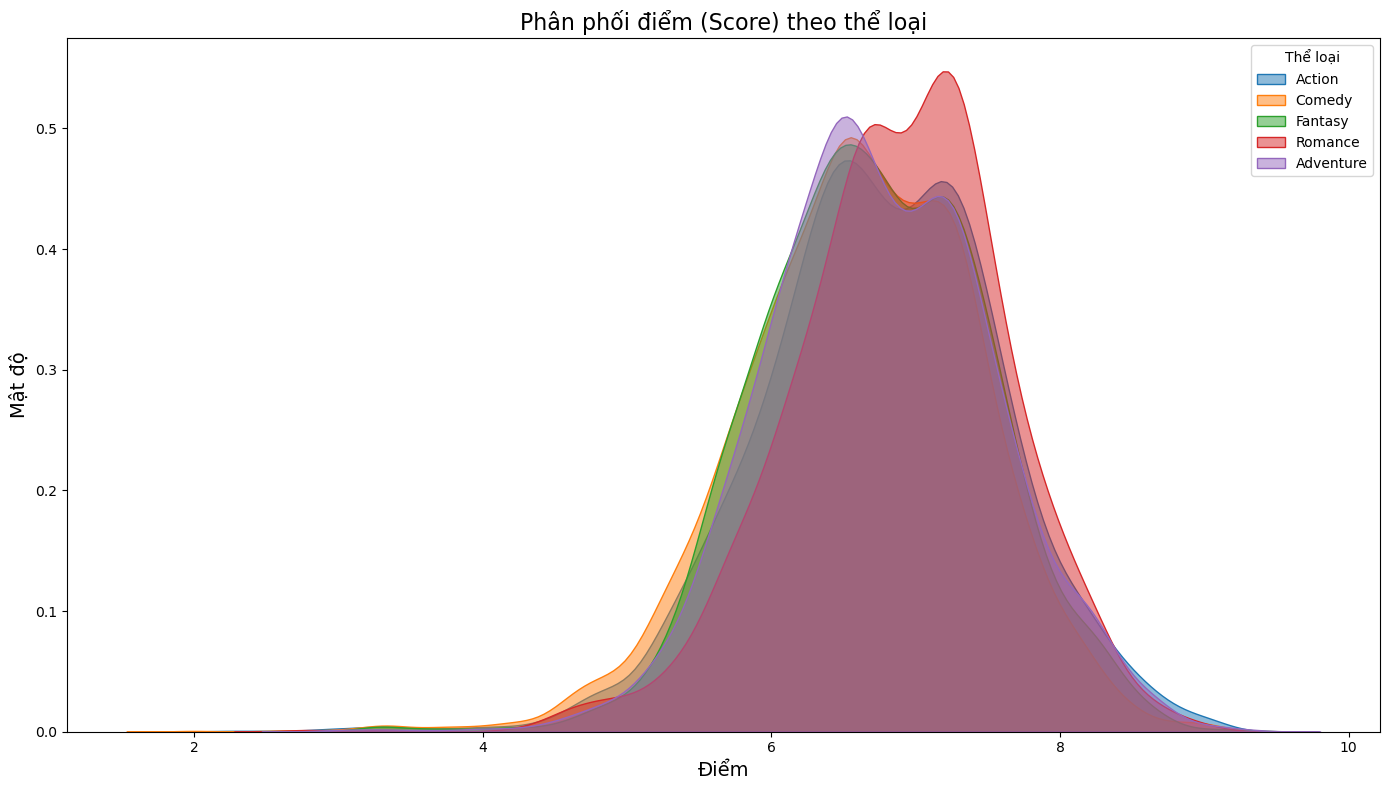

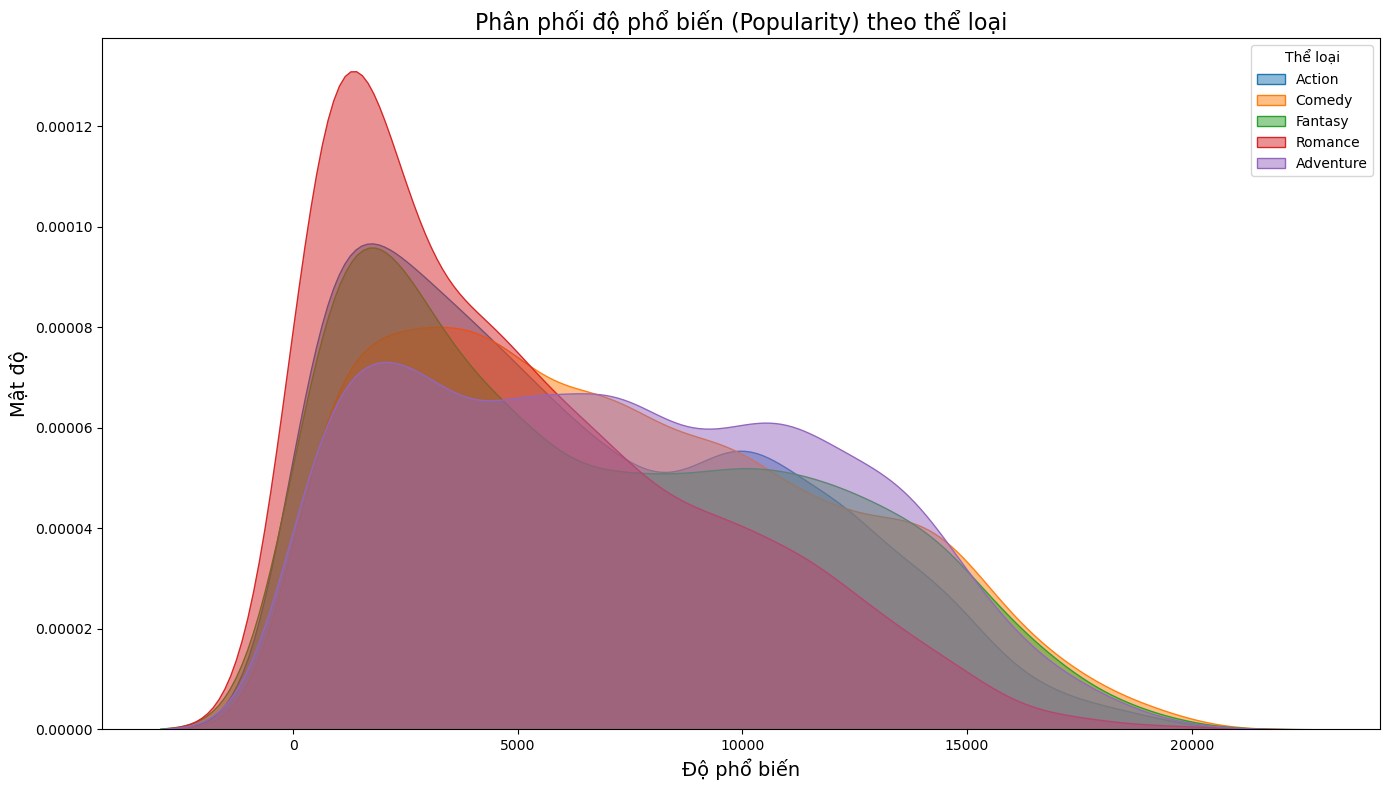

In [204]:
# Chọn một số thể loại để phân tích
selected_genres = ['Action', 'Comedy', 'Fantasy', 'Romance', 'Adventure']

# Phân phối điểm số
plt.figure(figsize=(14, 8))
for genre in selected_genres:
    sns.kdeplot(df[df[genre] == 1]['Score'], label=genre, fill=True, alpha=0.5)
plt.title('Phân phối điểm (Score) theo thể loại', fontsize=16)
plt.xlabel('Điểm', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(title='Thể loại')
plt.tight_layout()
plt.show()

# Phân phối độ phổ biến
plt.figure(figsize=(14, 8))
for genre in selected_genres:
    sns.kdeplot(df[df[genre] == 1]['Popularity'], label=genre, fill=True, alpha=0.5)
plt.title('Phân phối độ phổ biến (Popularity) theo thể loại', fontsize=16)
plt.xlabel('Độ phổ biến', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(title='Thể loại')
plt.tight_layout()
plt.show()
